In [1]:
raw_ncar_folder_path = '/home/idies/workspace/turb/data02_02/ariel-6-timestep-ncar-netCDF/'
timestep_nr = 0

In [2]:
import xarray as xr
import numpy as np
import zarr
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [3]:
ncar_data = xr.open_dataset(raw_ncar_folder_path + "jhd." + str(timestep_nr).zfill(3) + ".nc")

In [4]:
# ncar_data.info

In [21]:
def init(): 
    # creating an empty plot/frame 
    im.set_data(np.zeros((512, 512)))
    return [im]

# animation function 
def animate(i):
    im.set_data(data[i, :, :])
    return [im]

In [19]:
data = np.array(ncar_data['t'][:200])

In [20]:
vmin = np.min(data)
vmax = np.max(data)

In [ ]:
fig = plt.figure(figsize=(12, 12))

im = plt.imshow(data[0, :, :], vmin=vmin, vmax=vmax, animated=True, cmap='gray')

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=200, blit=True)

In [25]:
# save the animation to disk
ani.save('3d_data_animation.gif', writer='pillow', fps=5)
# ani.save('3d_data_animation.mp4', writer='ffmpeg', fps=30)

plt.show()

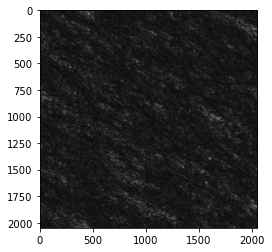

In [30]:
plt.imshow(var_np[0], cmap='gray')

plt.show()

In [ ]:
def save_plots_sequential(array_name, val_min, val_max, nr_images):


    for i in range(200):
        plt.figure(figsize=(18,18))
        # vmin, vmax necessary for image brightness to stay consistent across frames
        plt.imshow(array_name[i], cmap='gray', vmin=val_min, vmax=val_max)

        plt.savefig("visualizations/" + str(i) + ".jpg")
        #, *, dpi='figure', format=None, metadata=None,
    #         bbox_inches=None, pad_inches=0.1,
    #         facecolor='auto', edgecolor='auto',
    #         backend=None, **kwargs
    #        )

In [ ]:
save_plots_sequential(v, vmin, vmax, 200)

In [ ]:
from joblib import Parallel, delayed

### <font color="orange">This says "Disk Quota exceeded" even though its not</font>

In [ ]:
def save_plots_parallel(array_name, val_min, val_max, i):
    # Turn interactive plotting off
    plt.ioff() # Don't display plots until calling plt.show() - Faster

    plt.figure(figsize=(18,18))
    # vmin, vmax necessary for image brightness to stay consistent across frames
    plt.imshow(a[i], cmap='gray', vmin=val_min, vmax=val_max)

    plt.savefig("visualizations/" + str(i) + ".jpg")
    #, *, dpi='figure', format=None, metadata=None,
#         bbox_inches=None, pad_inches=0.1,
#         facecolor='auto', edgecolor='auto',
#         backend=None, **kwargs
#        )

In [ ]:
_ = Parallel(n_jobs=8, backend="multiprocessing")(delayed(save_plots_parallel)(e, emin, emax, i) for i in range(200))

### Try plotting with FuncAnimation - <font color="orange">saving to MP4 runs forever when I last tried :(</font>

In [ ]:
%matplotlib widget

In [ ]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# data = np.random.rand(100,50,50)

fig, ax = plt.subplots()

var = "e"

# ax.set_xlim((0, 50))
# ax.set_ylim((0, 50))

im = ax.imshow(ds[var][:,:,0])

def init():
    im.set_data(ds[var][:,:,0])
    return (im,)

# animation function. This is called sequentially
def animate(i):
    data_slice = ds[var][:,:,i]
    im.set_data(data_slice)
    return (im,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=25, interval=50, blit=False)

HTML(anim.to_html5_video())

In [ ]:
# f = r"animation.gif"  # This runs forever
# writergif = animation.PillowWriter(fps=30) 
# anim.save(f, writer=writergif)

In [ ]:
from matplotlib.animation import FFMpegWriter

class FasterFFMpegWriter(FFMpegWriter):
    '''FFMpeg-pipe writer bypassing figure.savefig.'''
    def __init__(self, **kwargs):
        '''Initialize the Writer object and sets the default frame_format.'''
        super().__init__(**kwargs)
        self.frame_format = 'argb'

    def grab_frame(self, **savefig_kwargs):
        '''Grab the image information from the figure and save as a movie frame.

        Doesn't use savefig to be faster: savefig_kwargs will be ignored.
        '''
        try:
            # re-adjust the figure size and dpi in case it has been changed by the
            # user.  We must ensure that every frame is the same size or
            # the movie will not save correctly.
            self.fig.set_size_inches(self._w, self._h)
            self.fig.set_dpi(self.dpi)
            # Draw and save the frame as an argb string to the pipe sink
            self.fig.canvas.draw()
            self._proc.stdin.write(self.fig.canvas.tostring_argb())
        except (RuntimeError, IOError) as e:
            out, err = self._proc.communicate()
            raise IOError('Error saving animation to file (cause: {0}) '
                      'Stdout: {1} StdError: {2}. It may help to re-run '
                      'with --verbose-debug.'.format(e, out, err)) 

In [ ]:
writer = FasterFFMpegWriter()

In [ ]:
anim.save('im.mp4', writer=writer)

In [ ]:
# HTML(anim.to_html5_video())

### <font color="orange"> Manually/visually verify same floating point data</font>

In [50]:
u = np.array(ncar_data['u'][1,:,:])
# u.shape

In [51]:
np.array(ncar_data['u'][0,512:,512:])

array([[-7.7321744, -7.74802  , -7.7555737, ..., -7.578183 , -7.660217 ,
        -7.703742 ],
       [-7.8281803, -7.7234564, -7.7084837, ..., -7.5142097, -7.6329074,
        -7.675485 ],
       [-7.8256283, -7.7765794, -7.680695 , ..., -7.52332  , -7.6085763,
        -7.6417866],
       ...,
       [-7.6701655, -7.614923 , -7.6223135, ..., -7.825067 , -7.7980294,
        -7.7751007],
       [-7.644671 , -7.639979 , -7.652285 , ..., -7.727286 , -7.719293 ,
        -7.73391  ],
       [-7.618292 , -7.606967 , -7.6489635, ..., -7.7380424, -7.711497 ,
        -7.683497 ]], dtype=float32)

In [52]:
asd = zarr.open("/home/idies/workspace/turb/data04_01/zarr/sabl2048a_04_prod/sabl2048a04_00.zarr")

In [53]:
split_velocity = asd["velocity"]
a = split_velocity[:,:,:,0]

# split_velocity.info

In [44]:
a[0,:,:]

array([[-7.7321744, -7.74802  , -7.7555737, ..., -7.6859345, -7.727465 ,
        -7.706152 ],
       [-7.8281803, -7.7234564, -7.7084837, ..., -7.606683 , -7.654765 ,
        -7.6911592],
       [-7.8256283, -7.7765794, -7.680695 , ..., -7.5816493, -7.584057 ,
        -7.6212234],
       ...,
       [-7.7175627, -7.7250104, -7.7433105, ..., -7.820018 , -7.797697 ,
        -7.7901163],
       [-7.592052 , -7.68508  , -7.7773533, ..., -7.7912755, -7.7639875,
        -7.756757 ],
       [-7.5195746, -7.585573 , -7.714969 , ..., -7.7252164, -7.699835 ,
        -7.712084 ]], dtype=float32)

In [45]:
import numpy as np

np.testing.assert_array_equal(
    ncar_data['u'][0,512:1024,512:1024],#.to_array,
    a[0,:,:]
)

### U-component of 000 seems good

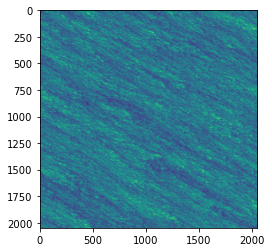

In [12]:
plt.imshow(u)

plt.show()

In [1]:
from ..zarr_writing import write_tools

ImportError: attempted relative import with no known parent package

In [ ]:
all_0_512_chunks

### Open Velocity split Ariel

In [13]:
!pwd

/home/idies/workspace/Storage/ariel4/persistent/ncar-zarr-code/zarr_reading


In [36]:
sabl01_00 = zarr.open("/home/idies/workspace/turb/data01_01/zarr/sabl2048a_01_prod/sabl2048a01_00.zarr")

In [37]:
split_velocity = sabl01_00["velocity"]

split_velocity.info

Name,/velocity
Type,zarr.core.Array
Data type,float32
Shape,"(512, 512, 512, 3)"
Chunk shape,"(64, 64, 64, 3)"
Order,C
Read-only,False
Compressor,None
Store type,zarr.storage.DirectoryStore
No. bytes,1610612736 (1.5G)
No. bytes stored,1610613124 (1.5G)


In [38]:
a = split_velocity[:,:,:,0]
a.shape

(512, 512, 512)

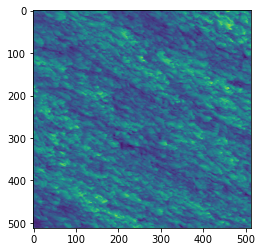

In [26]:
plt.imshow(a[1,:,:])

plt.show()